<a href="https://colab.research.google.com/github/BhaskarMendhe358/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

# **Installing And Importing Necessary Libraries**

In [ ]:
!pip install klib

In [2]:
# To load the data from csv file
import pandas as pd 

# To Perform Mathemetiacal Operations
import numpy as np

from scipy import stats as st

from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import math

# To visualize data and get insight 
import matplotlib.pyplot as plt
import seaborn as sns


#For cleaning, analyzing and preprocessing the data
import klib

# To avoid the warning that aren't necessarily
import warnings
warnings.filterwarnings('ignore')

import datetime as dt

# Sets the backend of seaborn to the 'inline' backend
sns.set()
# Sets the backend of matplotlib to the 'inline' backend
%matplotlib inline

# Pre-defining the font type and size to provide same throughout the code
font = {'family' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

# Pre-defining the color schema
sns.set_palette('gist_ncar')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Setting the path
nyct = pd.read_csv("/content/drive/MyDrive/AlmaBetter/NYC Taxi Trip Prediction/NYC Taxi Data.csv")

# **Data Exploration**

In [5]:
#Loading the dataset
nyct

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [6]:
#Checking the first five rows of dataset
nyct.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [7]:
#Checking the shape of the dataset
nyct.shape

(1458644, 11)

Here, we have 1458644 rows and 11 columns in the dataset.

In [8]:
#Information of the whole dataset
nyct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


Dataset contains 11 rows in which id, pickup_datetime, dropoff_datetime, store_and_fwd_flag has datatype "Object".

vendor_id, passenger_count, and trip duration has datatype "int".

Whereas pickup_longitude, pickup_latitude, dropoff_longitude, and dropoff_latitude has the datatype "float".

In [9]:
#Description of the data
nyct.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


Passenger_count varies from 0 to 9. Maximum trip duration is of 3526282 seconds and almost 979.5 hours and minimum 1 second. So, the dataset must contain the outliers that are needed to be treated further

In [10]:
#Checking null values
nyct.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Our dataset contains no null values.

In [11]:
#Checking duplicate values
nyct.duplicated().sum()

0

There are no duplicate values in the dataset.

In [12]:
#Checking unique values each columns
nyct.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

In [13]:
#Checking data type of each column
nyct.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

Here, we can see that the pickup_datetime and dropoff_datetime are not in proper datetime datatype so we need to convert them to datetime.

# **Data Preprocessing**

In [14]:
#Converting pickup_datetime and dropoff_datetime to datetime
nyct['pickup_datetime'] = pd.to_datetime(nyct['pickup_datetime'])

nyct['dropoff_datetime'] = pd.to_datetime(nyct['dropoff_datetime'])

Again checking the datatypes.

In [15]:
nyct.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

Here we can see that pickup_datetime and dropoff_datetime are successfully converted to datetime datatypes.

# **Checking the type of data present in the dataset**

In [16]:
# Checking the number of numerical features and number of categorical features 

num_col = nyct.select_dtypes(include = 'number')
print("The number of Numerical columns are:",len(num_col.columns))

cat_col = nyct.select_dtypes(include = 'object')
print("\nThe number of Categorical columns are:",len(cat_col.columns))

The number of Numerical columns are: 7

The number of Categorical columns are: 2


Getting the number of unique values present in dataset

In [17]:
# Using Dictionary Comprehension to get the dictionary of the columns containing more than 1 unique value

unique_count_dict = {column: len(nyct[column].unique()) for column in nyct.columns}

In [18]:
# Creating seperate list of columns and count from the keys and values of the unique_count_dict

column_list = list(unique_count_dict.keys())
unique_value_count = list(unique_count_dict.values())

In [19]:
# Creating the Dataframe to display the columns and there count of unique values

unique_count_df = pd.DataFrame({'Column_name' : column_list, 'Number_of_Unique_Values' : unique_value_count})

In [20]:
# Sorting this above unique_count_df in ascending order to get to count of unique values present in each column
# Also used reset_index to reset the index and drop the previous index as it was shuffled while sorting values

unique_count_df.sort_values(by = ['Number_of_Unique_Values']).reset_index(drop = True)

,Column_name,Number_of_Unique_Values
0,vendor_id,2
1,store_and_fwd_flag,2
2,passenger_count,10
3,trip_duration,7417
4,pickup_longitude,23047
5,dropoff_longitude,33821
6,pickup_latitude,45245
7,dropoff_latitude,62519
8,pickup_datetime,1380222
9,dropoff_datetime,1380377


# **Feature Engineering**

In [21]:
#It will contain the day number instead of characters with Monday=0 and Sunday=6.
nyct['pickup_day']=nyct['pickup_datetime'].dt.day_name()
nyct['dropoff_day']=nyct['dropoff_datetime'].dt.day_name()

#It will convert weekday into number start at Monday=0 and end at Sunday=6.
nyct['pickup_day_no']=nyct['pickup_datetime'].dt.weekday
nyct['dropoff_day_no']=nyct['dropoff_datetime'].dt.weekday

#Extract hour only from pickup_datetime.
nyct['pickup_hour']=nyct['pickup_datetime'].dt.hour
nyct['dropoff_hour']=nyct['dropoff_datetime'].dt.hour

# Extract minute attribute from our datetime columns.
nyct['pickup_minute'] = nyct['pickup_datetime'].dt.minute
nyct['dropoff_minute'] = nyct['dropoff_datetime'].dt.minute

#Extract month in number only from pickup_datetime with January=1
nyct['pickup_month']=nyct['pickup_datetime'].dt.month
nyct['dropoff_month']=nyct['dropoff_datetime'].dt.month

We have created following features:

*  **Pickup_day and dropoff_day** : It will contain the name of the dayon which the ride was taken.
*  **Pickup_day_no and dropoff_day_no**: It will containthe day number like Monday = 0 and Sunday =6.
*  **Pickup_hour and dropoff_hour**: It will contain the hour in 24hr format.
*  **Pickup_minute and dropoff_minute**: It will contain the minutes.
*  **Pickup_month and dropoff_month**: It will contain month number with January = 1 and June = 6.

We also saw during dataset exploration that we have coordinates in the form of longitude and latitude for pickup and dropoff. But, we can’t really gather any insights or draw conclusions from that. So, the most obvious feature that we can extract from this is distance. Let us do that

In [22]:
#Importing great circle from geopy distance to create feature distance
from geopy.distance import great_circle

In [23]:
#Creating function to calculate the distance
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates,).km

In [24]:
#Applying the function to our dataset and creating the feature ‘distance’.
nyct['distance'] = nyct.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [25]:
#creating new feature Speed
nyct['speed'] = (nyct.distance*3600/(nyct.trip_duration))

Next,Lets defined a function that lets us determine what time of the day the ride was taken.

We will create four parts of time:-

1.**Morning** (from 6:00 am to 11:59 pm),

2.**Afternoon** (from 12 noon to 3:59 pm),

3.**Evening** (from 4:00 pm to 9:59 pm), and

4.**Late Night** (from 10:00 pm to 5:59 am)

In [26]:
#Dividing 24 hours into four parts
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [27]:
#Now let us apply this function and create new columns in the dataset.
nyct['pickup_timeofday'] = nyct['pickup_hour'].apply(time_of_day)
nyct['dropoff_timeofday']=nyct['dropoff_hour'].apply(time_of_day)

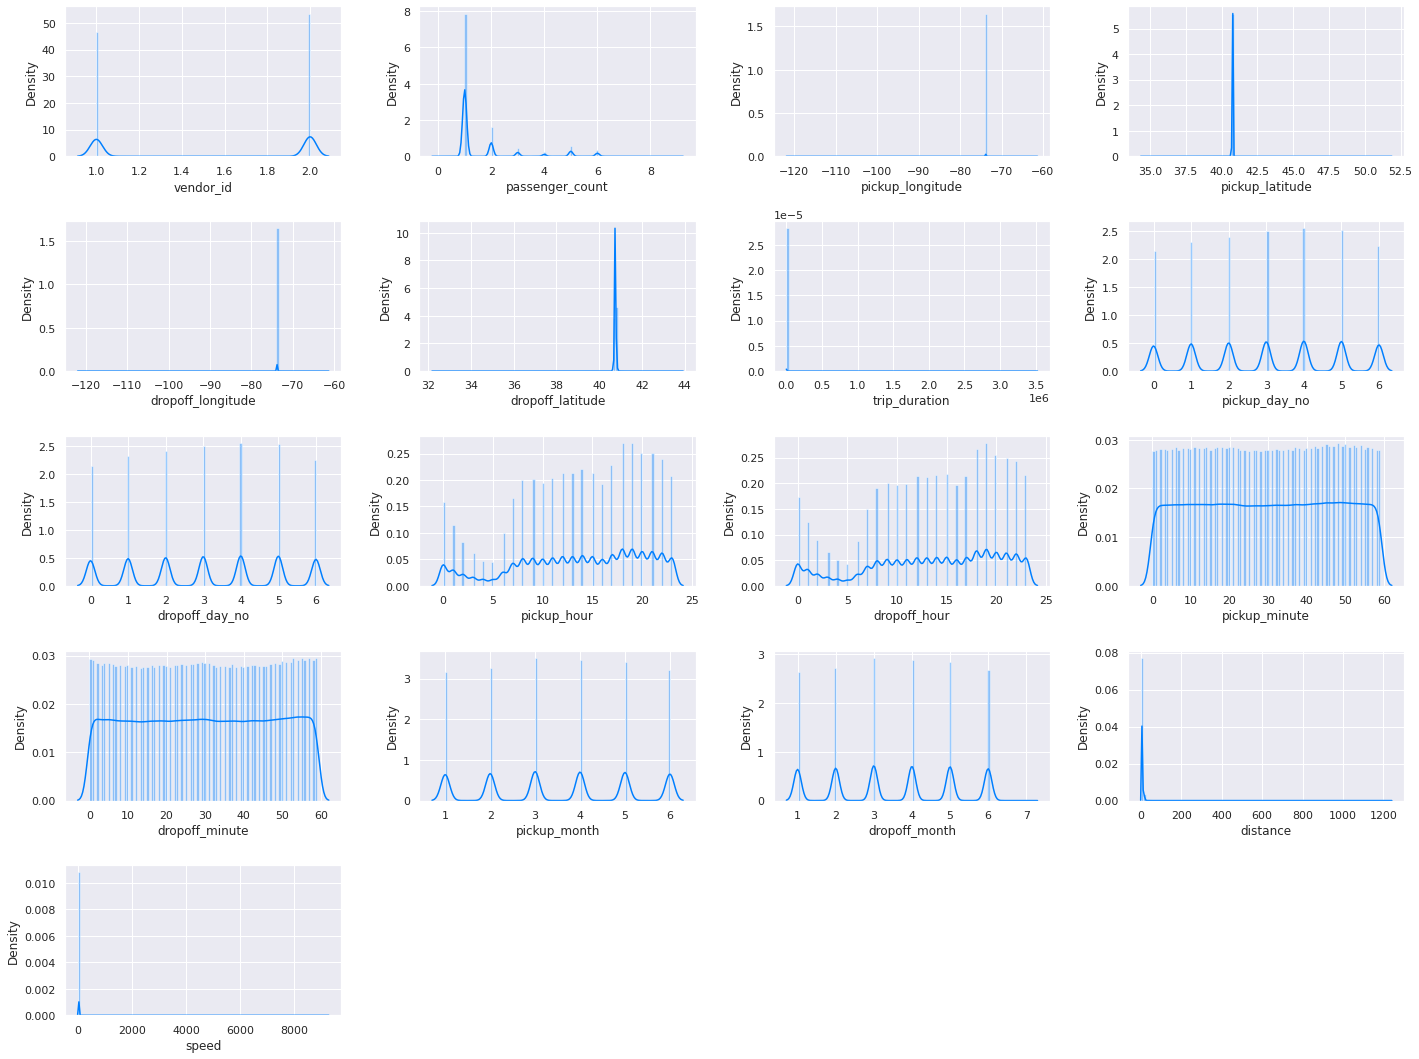

In [28]:
#Default representation of distribution plot
columns = nyct.select_dtypes(include=np.number).columns.tolist()

n = 1

plt.figure(figsize=(20,15))

for column in columns:   
    
    plt.subplot(5,4,n)
    
    n = n+1
    sns.distplot(nyct[column], bins = 100)
    
    plt.tight_layout()

Here, we can see that many of the columns are not properly distributed. Trip_duration and Distance are highly rigth skewed as they contain large number of outliers which are needed to be treated further.

# **Trip Duration**

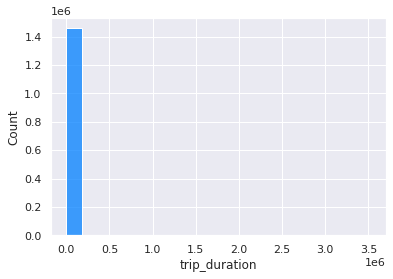

In [29]:
#plotting histogram for trip duration
sns.histplot(nyct['trip_duration'],kde=False,bins=20)

Text(0.5, 1.0, 'Boxplot for trip duration distribution')

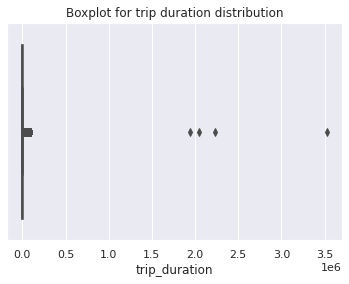

In [30]:
# Box plot for trip duration
sns.boxplot(nyct['trip_duration'])
plt.title('Boxplot for trip duration distribution')

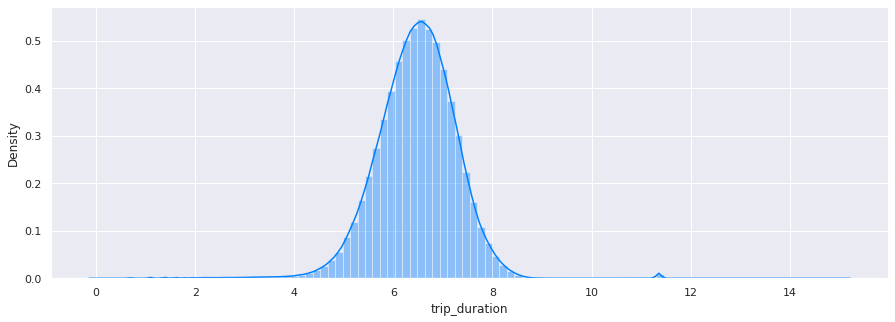

In [31]:
#Coverting our trip duration column into log transformation so that we can get some improvement in our trip duration column
plt.figure(figsize = (15,5))
sns.distplot(np.log(nyct['trip_duration']), bins = 100)
plt.show()

Here we can observe that the distribution is now in normal distribution but also the is some smal peak but we will use log transformed column for the training.

# **Exploratory Data Analysis**

### **Univariate Analysis**

Vendor_id

In [32]:
#Checking unique vendor count
nyct['vendor_id'].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

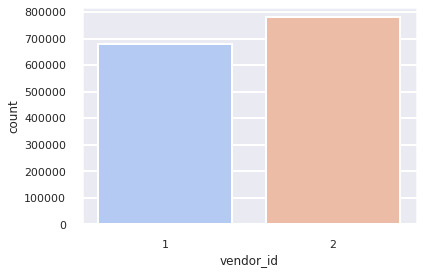

In [33]:
#Ploting count plot for vendor_id
sns.set_context('poster', font_scale = 0.5)
sns.countplot(x ='vendor_id', data = nyct , palette ='coolwarm')

From the above plot we can say that most of the trips were taken by the 2nd vendor also we can say that there is not much difference between both of them.

Passenger Counts

In [34]:
nyct['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

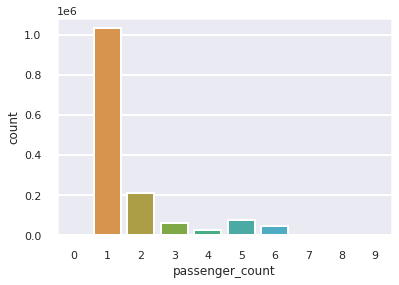

In [35]:
#Plotting count plot for passenger count
sns.countplot(nyct['passenger_count'])

Here, we can see that only one or two passengers booked the cab. The booking of cab by large group of people is very rare. The passenger count 0 has no trips yet it is being registered. The Number of bookings for 7 passengers are 3 and number of bookins for 8 and 9 passenger is 1. Further, the cab for 7,8, 9 passengers can be considered as outliers so let's remove the rows containing 0, 7,8 and 9.

In [36]:
#To remove 0 and passenger counts more than 6
nyct = nyct[nyct['passenger_count'] != 0]
nyct = nyct[nyct['passenger_count']<=6]

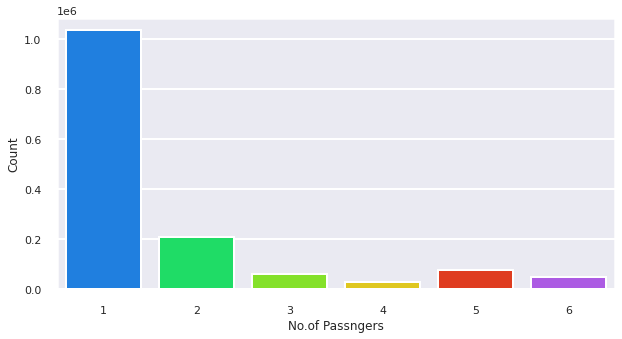

In [37]:
#Again checking the count plot for passenger count after removing rows 0, 7, 8, 9
plt.figure(figsize = (10,5))
sns.countplot(x='passenger_count',data=nyct)
plt.ylabel('Count')
plt.xlabel('No.of Passngers')
plt.show()

# **Pickup day and dropoff day/week**

In [38]:
#Value counts for pickup day
pd.DataFrame(nyct['pickup_day'].value_counts())

,pickup_day
Friday,223521
Saturday,220855
Thursday,218566
Wednesday,210132
Tuesday,202745
Sunday,195352
Monday,187408


In [39]:
#Value counts for dropoff day
pd.DataFrame(nyct['dropoff_day'].value_counts())

,dropoff_day
Friday,223020
Saturday,220888
Thursday,217738
Wednesday,209786
Tuesday,202513
Sunday,197210
Monday,187424


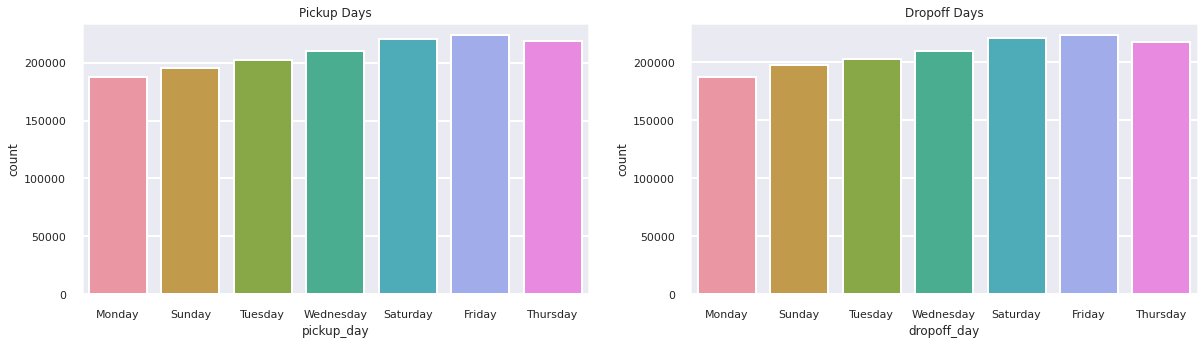

In [40]:
#lets see pickup and dropoff count days wise
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=nyct,ax=ax1)
ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=nyct,ax=ax2)

From above plot we can see that the pickup and dropoff were busiest at friday followed by saturday as it must be due to weekend that most of the peoples plan trips.

# **Pickup and Dropoff during daypartings**

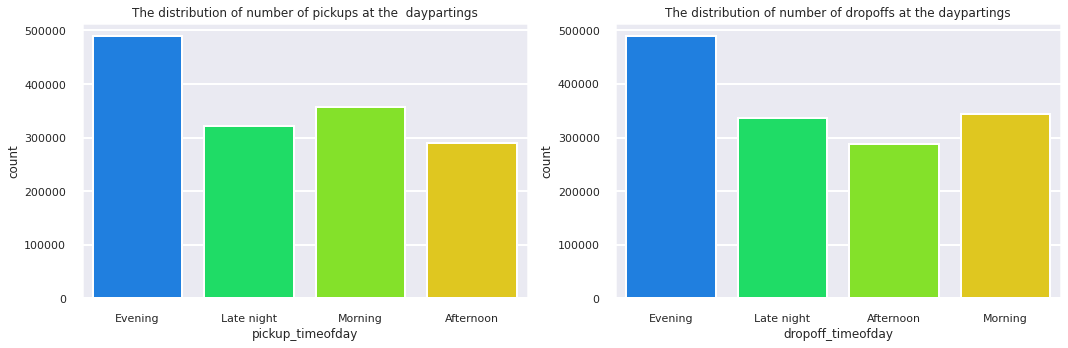

In [41]:
#Plots for pickups and dropoffs during daypartings
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.countplot(x='pickup_timeofday',data=nyct,ax=ax[0])

ax[0].set_title('The distribution of number of pickups at the  daypartings')
sns.countplot(x='dropoff_timeofday',data=nyct,ax=ax[1])

ax[1].set_title('The distribution of number of dropoffs at the daypartings')
plt.tight_layout()

Here, we can see that most of the pickups and dropoffs tookplace at time of evening which is normal as people head to their home after they finished with their jobs.

# **Pickup and dropoff at each hour of the day**

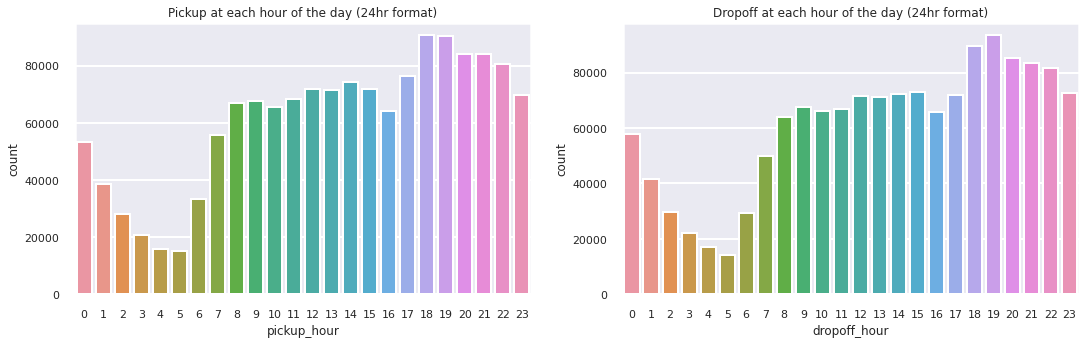

In [43]:
#Plotting count plot for Pickup and Dropoff at each hour of the day
figure,(ax1,ax2) = plt.subplots(ncols=2, figsize=(18,5))
ax1.set_title('Pickup at each hour of the day (24hr format)')
ax = sns.countplot(x='pickup_hour', data = nyct, ax = ax1)
ax2.set_title('Dropoff at each hour of the day (24hr format)')
ax = sns.countplot(x = 'dropoff_hour', data = nyct, ax = ax2)

In pickup and dropoff at day partings we saw most of the trips took place at evening likely in pickup and dropoff at each hour of the day the maximum trips took place at 6 - 7 P.M.

# **Pickup and dropoffs at every month**

In [44]:
#Checking value counts for pickup/month
nyct['pickup_month'].value_counts().sort_index()

1    229692
2    238288
3    256179
4    251636
5    248474
6    234310
Name: pickup_month, dtype: int64

In [45]:
#Checking value counts for dropoff/month
nyct['dropoff_month'].value_counts().sort_index()

1    229641
2    238280
3    256125
4    251627
5    248542
6    234237
7       127
Name: dropoff_month, dtype: int64

Here we can see that we got 6 months for pickup and 7 months for dropoffs in which the trips took place.

In [46]:
#Substracting maximum pickup date from min pickup date
total_pickup_dt = nyct['pickup_datetime'].max() - nyct['dropoff_datetime'].min()

#Dividing total_pickpu_dt with numpy method and converting time difference into months
total_pickup_dt = total_pickup_dt/np.timedelta64(1, 'M')

print("Total_pickup datetime: " ,round(total_pickup_dt,1))

Total_pickup datetime:  6.0


In [47]:
#Substracting the maximum dropoff datetime from minimum dropoff datetime
total_dropoff_dt = nyct['dropoff_datetime'].max() - nyct['dropoff_datetime'].min()

total_dropoff_dt = total_dropoff_dt / np.timedelta64(1, 'M')

print('Total dropoff datetime:',round(total_dropoff_dt,1))


Total dropoff datetime: 6.0


Here we can see that the total data is of 6 months that is the reason we are getting 6 months in our month values.

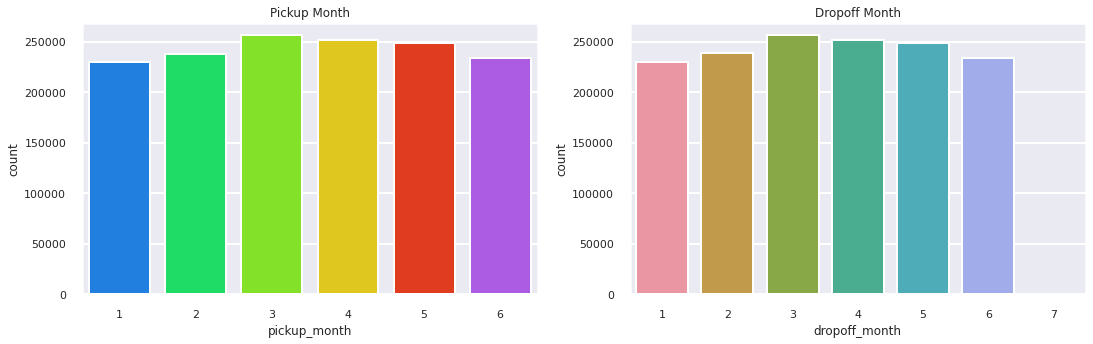

In [48]:
#Plotting countplot for pickup and dropoff per month
figure,(ax3,ax4) = plt.subplots(ncols = 2, figsize = (18,5))
ax3.set_title('Pickup Month')
ax = sns.countplot(x = 'pickup_month', data = nyct, ax = ax3)
ax4.set_title('Dropoff Month')
ax = sns.countplot(x = 'dropoff_month', data = nyct, ax = ax4)

From above we can see that the month of march and april were busiest of booking cabs.

# **The distribution of stored and forward flag**

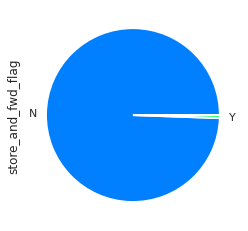

In [49]:
#Plotting pie plot for stored and forward flag
nyct['store_and_fwd_flag'].value_counts().plot(kind='pie')

We can see that only about 1% of the trip details were stored in the vehicle memory first before sending it to the server.

This might have occured because of the GPS or mobile device battery was down when the trip finished.

# **Distance**

In [50]:
nyct['distance'].value_counts().sort_index()

0.000000       5887
0.000424          1
0.000424          1
0.000424          3
0.000424          2
               ... 
562.235982        1
574.876255        1
578.843635        1
891.215362        1
1240.910430       1
Name: distance, Length: 1452309, dtype: int64

*  Here we can see that there are large number of counts for 0 distance which are not required in our data.

*  This must have been happened due to some technical error in the software system.

*  Driver must have done this to complete the target trip.

*  The trip must be canceled by the driver or passenger due to some reason.

In [51]:
#Droping the data for distance = 0
data = nyct[nyct['distance'] != nyct['distance'].min()]

Text(0.5, 1.0, 'Distance and Duration')

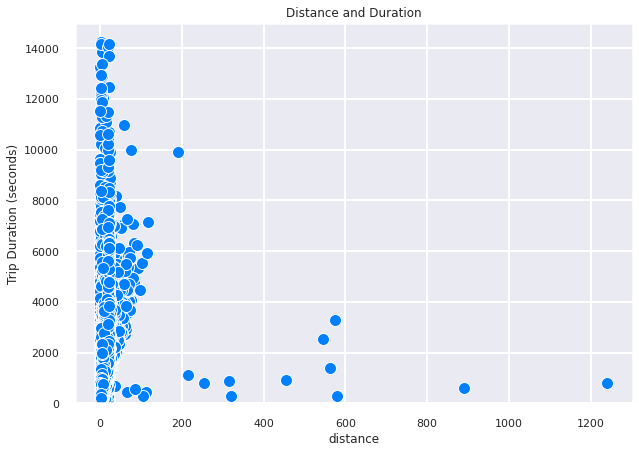

In [52]:
#Distribution plot for distance above 50m
plt.figure(figsize=(10,7))

sns.scatterplot(x="distance",y="trip_duration",data=data)
plt.ylim(0,15000)
plt.ylabel('Trip Duration (seconds)')

plt.title('Distance and Duration')

Here we can see that the distance from 0 - 100km has the dense trip duration.

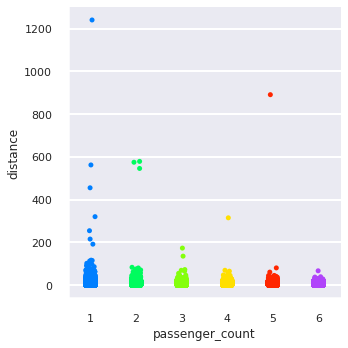

In [53]:
#lets see distance for each passenger count
sns.catplot(y='distance',x='passenger_count',data=nyct,kind='strip')

We see some of the longer distances are covered by either 1 or 2 or 4 passenger rides.

In [54]:
#Checking mean distance for every hour
hourly_mean_dist = nyct.groupby(['pickup_hour'])['distance'].agg(np.mean)
hourly_mean_dist

pickup_hour
0     3.998900
1     3.945895
2     3.866495
3     4.106036
4     4.873691
5     5.387027
6     4.113545
7     3.386929
8     3.016665
9     2.928074
10    2.998401
11    3.078260
12    3.064248
13    3.256400
14    3.402589
15    3.411632
16    3.505812
17    3.312159
18    3.115781
19    3.121266
20    3.461177
21    3.615632
22    3.755644
23    3.990048
Name: distance, dtype: float64

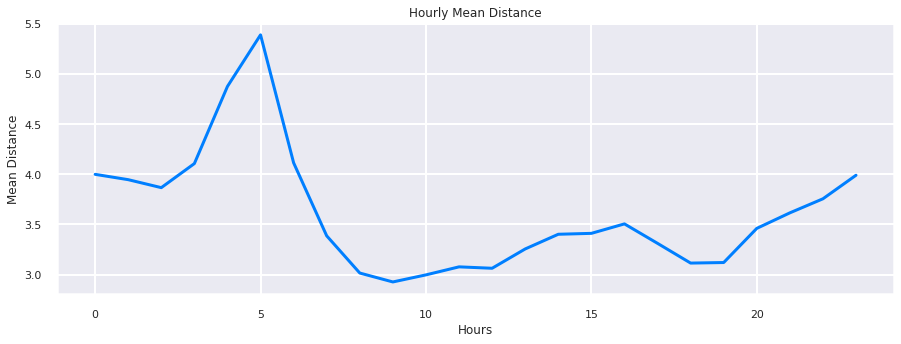

In [55]:
hourly_mean_dist.plot(figsize = (15,5))
plt.title("Hourly Mean Distance")
plt.xlabel("Hours")
plt.ylabel("Mean Distance")
plt.show()

The longest distance travelled at late to early morning.

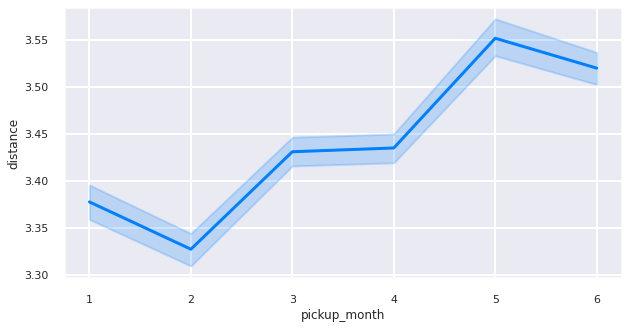

In [56]:
# line graph between Distance and pickup month
plt.figure(figsize = (10,5))
sns.lineplot(x='pickup_month',y='distance',data= nyct)

Here we can see that the maximum distance was covered in the month of May and least in February.

# **Speed**

In NYC the maximum speed limit is 40 km/hr in urban areas and on highways it's 104 km/hr.

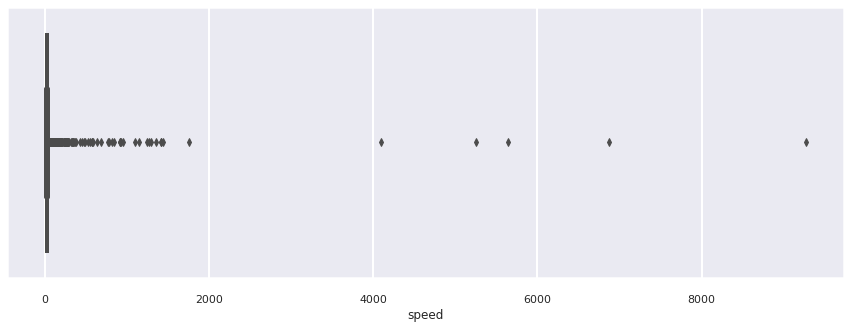

In [57]:
# Box plot for speed to check outliers
plt.figure(figsize = (15,5))
sns.boxplot(nyct.speed)
plt.show()

Removing trips with the speed of over 200 km/hr for data consistency.

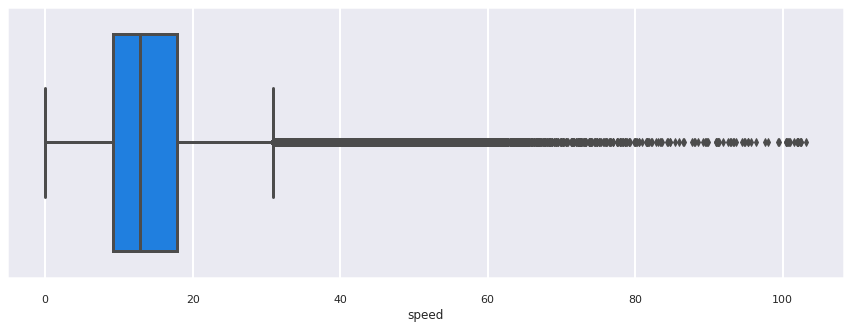

In [58]:
# Selecting data where speed is less than or equal to 104 km/hr
nyct = nyct[nyct['speed'] <= 104]
plt.figure(figsize = (15,5))

# Again box plot for speed variable
sns.boxplot(nyct.speed)
plt.show()

Most of the trips are done under 0-20 km/hr and above 30 km/hr are all outliers but still they are under the 104 km/hr which is the maximum speed limit.

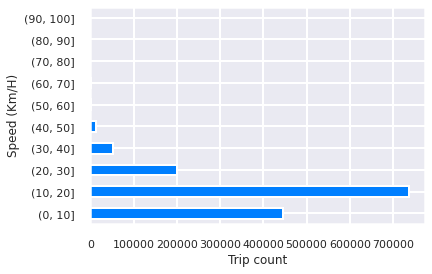

In [59]:
#Checkng the speed limit from 0 - 104 km/hr
nyct.speed.groupby(pd.cut(nyct.speed, np.arange(0,104,10))).count().plot(kind = 'barh') 
plt.xlabel('Trip count')
plt.ylabel('Speed (Km/H)')
plt.show()

In the above graph most of the trips are with 10-20 km/hr range as mentioned earlier.

# **Bivariate Analysis And Multivariate Analysis**

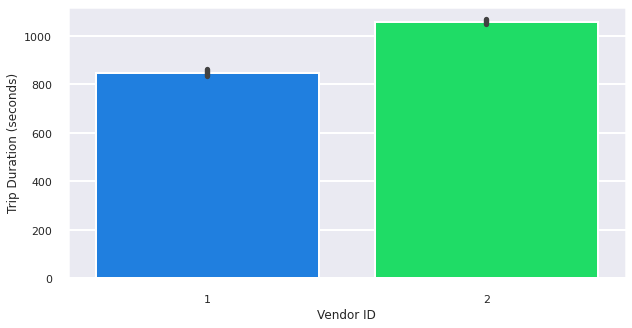

In [60]:
#Trip duration per vendor
plt.figure(figsize = (10,5))
sns.barplot(x='vendor_id', y = 'trip_duration', data = nyct, estimator=np.mean)
plt.xlabel('Vendor ID')
plt.ylabel('Trip Duration (seconds)')
plt.show()

From this we can see that vendor 2 provides more long trips than vendor 1 Still not significant enough.

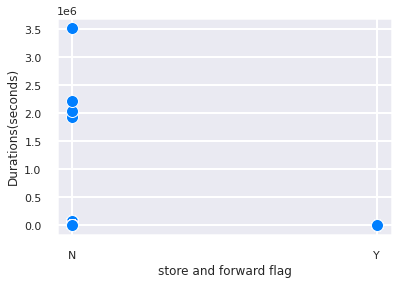

In [61]:
#Trip duration per store and forward flag
sns.scatterplot(x = 'store_and_fwd_flag', y = 'trip_duration', data = nyct  )
plt.xlabel('store and forward flag')
plt.ylabel('Durations(seconds)')
plt.show()

Here, we can see that most of the data of the long trips haven't stored on the server.

Text(0.5, 1.0, 'Trip duration per hour')

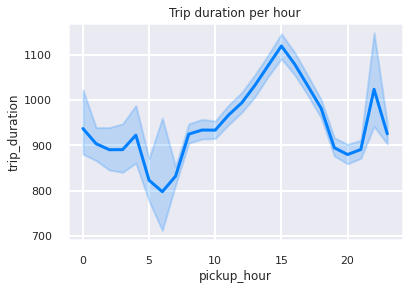

In [62]:
#Trip duration per hour
ax = sns.lineplot(x = 'pickup_hour', y = 'trip_duration', data = nyct)
ax.set_title('Trip duration per hour')

Here, we can see that the duration of the trips were busy during 3 P.m. may be due to heavy traffic. Trip duration were least around 5:30a.m - 6a.m as light traffic.

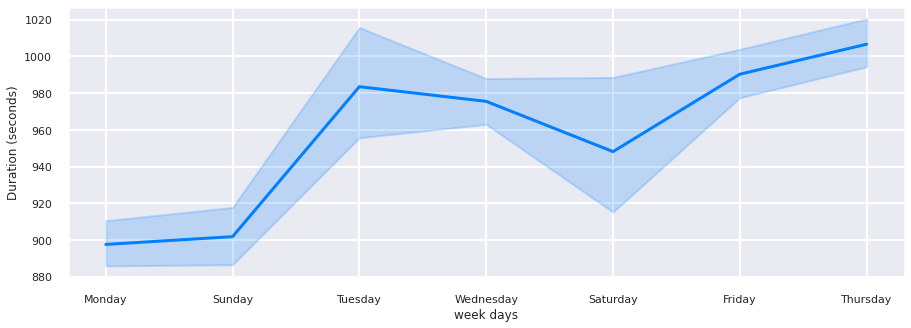

In [63]:
#Trip duration per day
plt.figure(figsize = (15,5))
sns.lineplot(x = 'pickup_day', y = 'trip_duration', data = nyct)
plt.ylabel('Duration (seconds)')
plt.xlabel('week days')
plt.show()

Here, we can see that the trip durations are maximum on working days i.e (Tuesday, wednesday, thursday and Friday). Trip duration was least during weekoffs i.e. (Saturday, Sunday and Monday).

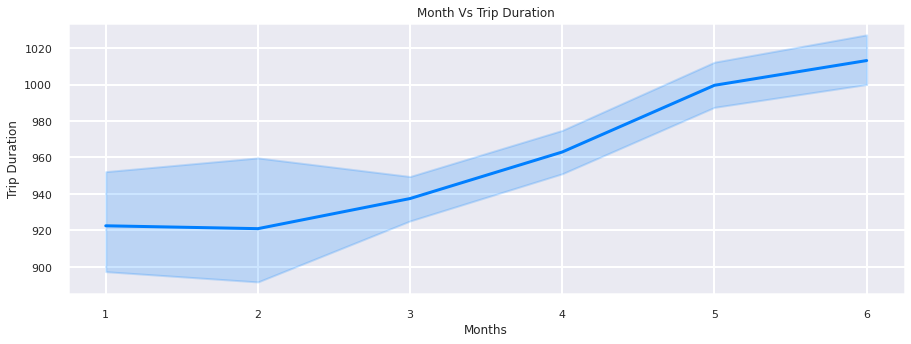

In [64]:
# Trip duration per month
plt.figure(figsize = (15, 5))
sns.lineplot(x = 'pickup_month', y = 'trip_duration', data = nyct)
plt.title('Month Vs Trip Duration')
plt.xlabel('Months')
plt.ylabel('Trip Duration')
plt.show()

Here, we can see that the trip duration start increasing from the month of march before that its quite constant.

# **One Hot Encoding**

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

Dummyfying features like store forward flag and weekdays.

In [65]:
nyct.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_hour,dropoff_hour,pickup_minute,dropoff_minute,pickup_month,dropoff_month,distance,speed,pickup_timeofday,dropoff_timeofday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,17,17,24,32,3,3,1.498523,11.856445,Evening,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,0,0,43,54,6,6,1.805510,9.803673,Late night,Late night


In [66]:
#One hot coding
nyc_taxi = pd.get_dummies(nyct, columns=["store_and_fwd_flag", "pickup_timeofday","dropoff_timeofday"], prefix=["store", "pickup","dropoff"])


# **Correlation between the features**

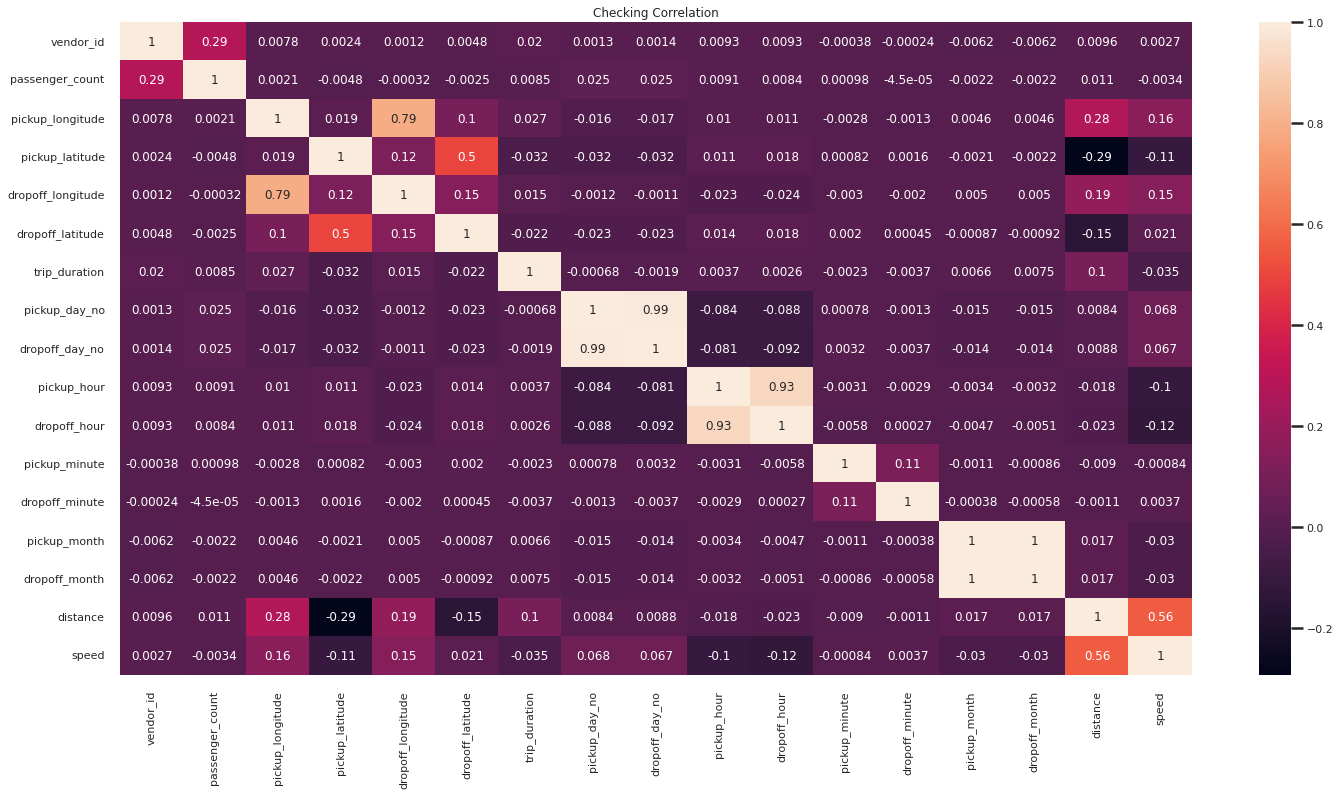

In [67]:
# Checking Correlation
plt.figure(figsize=(24,12))

# getting correlation using corr() function
cor = nyct.corr()
sns.heatmap(cor, annot=True, annot_kws={"size":12})
plt.title("Checking Correlation")
plt.show()

Here we can see there are lot of correlated features that are required to be detected by defining a function that will get us the correlated features.

In [68]:
#By this function we can select highly correlated features
def correlation(dataset, threshold):
   
   # Set of all the names of correlated columns
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [69]:
#Calling the function with threshold value 0.95
corr_features = correlation(data, 0.95)
print('Number of correlated features :',len(set(corr_features))) # getting the length of the number of correlated features

Number of correlated features : 2


In [71]:
#Printing correlated features
print('Correlated Features :')
corr_features

Correlated Features :


{'dropoff_day_no', 'dropoff_month'}

As we can see that the dropoff day no and dropoff month are highly correlated so we are going to drop them.

In [72]:
#Dropping dropoff day no and dropoff month
nyct.drop(['dropoff_day_no', 'dropoff_month'], axis=1, inplace = True)

We are also gonna drop id column as it is of no use.

In [73]:
#Dropping id column 
nyct.drop(['id'], axis = 1, inplace = True)

In [75]:
#Again checking if we have successfully dropped the columns
nyct.dtypes

vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_day                    object
dropoff_day                   object
pickup_day_no                  int64
pickup_hour                    int64
dropoff_hour                   int64
pickup_minute                  int64
dropoff_minute                 int64
pickup_month                   int64
distance                     float64
speed                        float64
pickup_timeofday              object
dropoff_timeofday             object
dtype: object

Here, we can see that we have successfully dropped id, dropoff day no and dropoff month.

In [76]:
# Again checking our shape of data

print('shape of data :',data.shape)

# printing the number of numerical features and number of categorical features 

num_col = nyct.select_dtypes(include = 'number')
print("\nThe number of Numerical columns are:",len(num_col.columns))

cat_col = nyct.select_dtypes(include = 'object')
print("\nThe number of Categorical columns are:",len(cat_col.columns))

shape of data : (1452692, 25)

The number of Numerical columns are: 15

The number of Categorical columns are: 5


In [77]:
# Taking all categorical column list to a variable cols
cols = nyct.select_dtypes(include = 'object').columns.tolist()

In [78]:
# importing LabelEncoder from sklearn

from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
labels = LabelEncoder()

for i in cols:
    
    # Using .fit_transform function to fit label
    # encoder and return encoded label
    nyct[i] = labels.fit_transform(nyct[i])

In [79]:
num_col = nyct.select_dtypes(include = 'number')
print("\nThe number of Numerical columns are:",len(num_col.columns))

cat_col = nyct.select_dtypes(include = 'object')
print("\nThe number of Categorical columns are:",len(cat_col.columns))


The number of Numerical columns are: 20

The number of Categorical columns are: 0


We have extracted the necessary trends from pickup datetime and dropoff datetime and now there is no use of both the column so dropping them will be good for consistency of our model

In [80]:
#Dropping the pickup_datetime and dropoff datetime
nyct.drop(['pickup_datetime', 'dropoff_datetime'], axis = 1, inplace = True)

In [81]:
#Checking the final shape of our dataset
nyct.shape

(1458422, 20)

Finally, we have 20 columns in which one column is the target variable i.e trip_duration

# **Separating the features and target variables to x and y variables**

In [82]:
# first we make a copy of  data  to a new variable
new_nyct = nyct.copy()

In [83]:
# seperating our data in feature and target variables
x = new_nyct.drop(['trip_duration'], axis = 1)

# taking our target variable into log form  
y = np.log(new_nyct['trip_duration']).values

# **Splitting our data into train and test variables**

In [84]:
# By using train test split from sklearn
from sklearn.model_selection import train_test_split

In [85]:
# Keeping 30% data for testing and 70% for training the model

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [86]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1020895, 19), (437527, 19), (1020895,), (437527,))

# **Modelling without standardizing the features**

In [87]:
# importing Linear regression from sklearn
from sklearn.linear_model import LinearRegression

# importing various matrics that well help us to analyze our regression model
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error

# importing decision tree regressor from sklearn
from sklearn.tree import DecisionTreeRegressor

# importing randon forest regressor from sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Importing XGBOOST
import xgboost

Defining a function that will take train and test data

In [88]:
models = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor,]

# function that will fit our models and train our models
def modeling(models):
    scores = []
    
    for i in models:
        
        if i == LinearRegression:
            
            # Creating instance for our model
            model = LinearRegression()
            
            # fitting our model using .fit funtion
            model.fit(x_train,y_train)
            
            # taking prediction from our model using .predict function
            print('Prediction by LinearRegression :\n', model.predict(x_test))

            #prediction actual vs predicted plot
            train_vs_pred_plot(y_test, model.predict(x_test))

            # appending scores to the list
            scores.append(model_results(model, model.predict(x_test)))        
        
    
        elif i == DecisionTreeRegressor:
            
            # Creating instance for our model
            model = DecisionTreeRegressor(criterion = 'mse', max_depth = 10)
            
            # fitting our model using .fit funtion
            model.fit(x_train,y_train)

            # taking prediction from our model using .predict function
            print('\nPrediction by DecisionTreeRegressor :\n', model.predict(x_test))

            #prediction actual vs predicted plot
            train_vs_pred_plot(y_test, model.predict(x_test))

               # appending scores to the list
            scores.append(model_results(model,model.predict(x_test))) 
            
            
        elif i == RandomForestRegressor:
            
             # Creating instance for our model
            model = RandomForestRegressor(criterion = 'mse', n_estimators = 10 ,
                                              max_depth = 10)
            
            # fitting our model using .fit funtion
            model.fit(x_train,y_train)
            
            # taking prediction from our model using .predict function
            print('\nPrediction by RandomForestRegressor :\n', model.predict(x_test))

            #prediction actual vs predicted plot
            train_vs_pred_plot(y_test, model.predict(x_test))

            # appending scores to the list
            scores.append(model_results(model,model.predict(x_test)))
          
    
     
    #printing all the scores for each model
    result = pd.concat(scores).reset_index(drop = True)
    return result.set_index(pd.Series(['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression']))

In [89]:
# Defining a Function that will calculate the accuracy, r2 and RMSE scores

def model_results(model,y_predicted):
    
    # getting Training Accuracy
    train_scr = model.score(x_train, y_train)
    
    #getting Test Accuracy
    test_scr = model.score(x_test, y_test)
    
    # getting R2 score
    r2_scr = r2_score(y_test, y_predicted)

    #Getting Adjusted R2 score
    p = x.shape[1]
    n = y_test.shape[0]
    a = (1 - r2_scr)
    b = (n - 1) / (n - p - 1)
    adj_r2_scr = (1 - (a * b))
    
    #getting mse
    mse = mean_squared_error(y_test,y_predicted)

    # getting RMSE
    rmse = np.sqrt(mse)
        
    matrics_name = ['Training_Score', 'Testing_Score', 'R2_Score', 'ADJ_R2', 'MSE', 'RMSE']
    matrics_value = [train_scr, test_scr, r2_scr, adj_r2_scr, mse, rmse]
    
    total_matrics = dict(zip(matrics_name,matrics_value))

    df = pd.DataFrame(data = [total_matrics])
    return df

In [90]:
# Defining a Function to plot the Regression graphs that will show the relation between actual and predicted values

def train_vs_pred_plot(actual,predicted):

  plt.figure(figsize = (6,3))

  fig, ax = plt.subplots()
  
  # scatter plot between actual and predicted values
  ax.scatter(actual, predicted)

  #getting the line which is our prediction line
  # through min and max of the values
  ax.plot([actual.min(), actual.max()], [actual.min(), actual.max()], '--', lw = 3)
  
  ax.set_xlabel('Actual_Values(Time_Duration)')
  
  ax.set_ylabel('Predicted_Values(Time_Duration)')
  
  plt.show()

In [91]:
# Defining a Funtion that will plot the R2 score comparision graph

def R2_score_plot(model,results):

  plt.figure(figsize=(6,3))

  # Getting our r2 scores
  r2_data = results['R2_Score']
  
  # ploting r2 values
  r2_data.plot(kind="bar", legend=False)
  
  plt.title("R2 SCORE COMPARISION PLOT")

  plt.show()

In [92]:
# Funtion that will plot the RMSE score comparision graph

def RMSE_score_plot(model,results):

  plt.figure(figsize=(6,3))

  # Getting our RMSE scores
  mse_data = results['RMSE']
  
  # ploting RMSE values
  mse_data.plot(kind="bar", legend=False)
  
  plt.title("RMSE SCORE COMPARISION PLOT")

  plt.show()

In [93]:
# Funtion that will plot the MSE score comparision graph

def MSE_score_plot(model,results):

  plt.figure(figsize=(6,3))

  # Getting our RMSE scores
  mse_data = results['MSE']
  
  # ploting RMSE values
  mse_data.plot(kind="bar", legend=False)
  
  plt.title("MSE SCORE COMPARISION PLOT")

  plt.show()

Prediction by LinearRegression :
 [5.76233521 6.5469791  6.14837798 ... 6.56147306 6.66251138 6.50533633]


<Figure size 432x216 with 0 Axes>

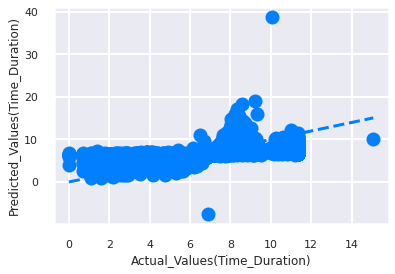


Prediction by DecisionTreeRegressor :
 [5.36369686 6.2559168  6.03155616 ... 6.94590581 7.01618777 6.95329929]


<Figure size 432x216 with 0 Axes>

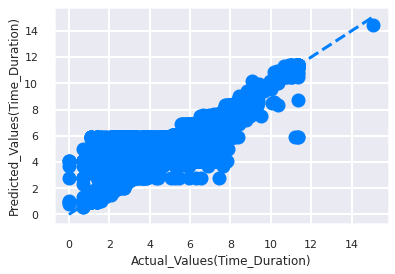


Prediction by RandomForestRegressor :
 [5.33751348 6.4788707  6.0360936  ... 6.90112559 6.94555982 6.90951515]


<Figure size 432x216 with 0 Axes>

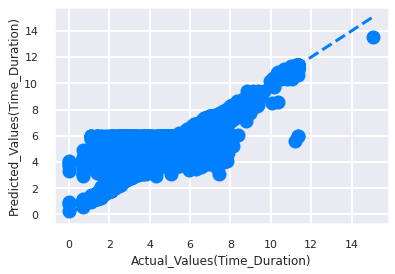

In [94]:
result_1 = modeling(models)

In [95]:
result_1

,Training_Score,Testing_Score,R2_Score,ADJ_R2,MSE,RMSE
Linear Regression,0.591141,0.591825,0.591825,0.591807,0.259843,0.509748
Decision Tree Regression,0.976706,0.975430,0.975430,0.975429,0.015641,0.125064
Random Forest Regression,0.980948,0.979897,0.979897,0.979896,0.012797,0.113126


# **Ridge Regressor**

In [96]:
from sklearn.linear_model import Ridge
#Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [97]:
print('The best fit alpha value is found out to be :' ,ridge_regressor.best_params_)
print('The R2 score using the same alpha is :', ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}
The R2 score using the same alpha is : 0.590138392406519


The best fit alpha value is found out to be : {'alpha': 10}


In [98]:
y_pred_ridge_train=ridge_regressor.predict(x_train)
y_pred_ridge_test = ridge_regressor.predict(x_test)

In [99]:
ridge_regressor.score(x_train,y_train)

0.5911403145652487

**Ridge Regression Model Evaluation**

In [100]:
#For trained data
ridge_train_mse  = mean_squared_error(y_train, y_pred_ridge_train)
print("Train MSE :" , ridge_train_mse)

ridge_train_r2 = r2_score(y_train, y_pred_ridge_train)
print("Train R2 :" ,ridge_train_r2)

ridge_train_r2_= 1-(1-r2_score(y_train, y_pred_ridge_train))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print("Train Adjusted R2 : ", ridge_train_r2)

Train MSE : 0.26066285565405756
Train R2 : 0.5911403145652487
Train Adjusted R2 :  0.5911403145652487


In [101]:
#For test data
ridge_test_mse  = mean_squared_error(y_test, y_pred_ridge_test)
print("Test MSE :" , ridge_test_mse)

ridge_test_r2 = r2_score(y_test, y_pred_ridge_test)
print("Test R2 :" ,ridge_test_r2)

ridge_test_r2_= 1-(1-r2_score(y_test, y_pred_ridge_test))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Test Adjusted R2 : ", ridge_test_r2_)

Test MSE : 0.25984349359915115
Test R2 : 0.5918249518108839
Test Adjusted R2 :  0.5918072256352671


In [102]:
ridge_regressor.score(x_test,y_test)

0.5918249518108839

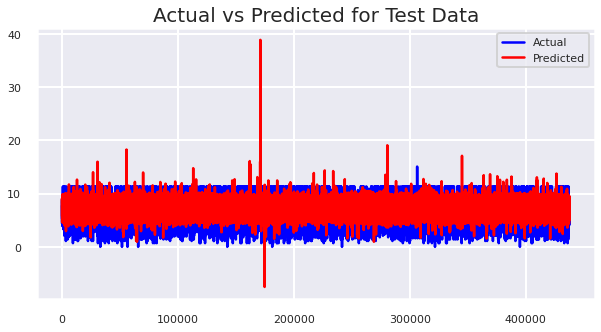

In [103]:
#Plotting Actual vs Prediction graph
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_ridge_test, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

# **Lasso** **Regressor**

In [104]:
from sklearn.linear_model import Lasso


#Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)
lasso_regressor.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [105]:
print('The best fit alpha value is found out to be :', lasso_regressor.best_params_)
print('The R2 score using the same alpha is :', lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}
The R2 score using the same alpha is : 0.5901363496821789


The best fit alpha value is found out to be : {'alpha': 1e-15}


In [106]:
lasso_regressor.score(x_train, y_train)

0.5911413136140178

In [107]:
y_pred_lasso_train = lasso_regressor.predict(x_train)
y_pred_lasso_test = lasso_regressor.predict(x_test)

Lasso Regression Model Evaluation

In [108]:
#For train data
lasso_train_mse  = mean_squared_error(y_train, y_pred_lasso_train)
print("Train MSE :" , lasso_train_mse)

lasso_train_r2 = r2_score(y_train, y_pred_lasso_train)
print("Train R2 :" ,lasso_train_r2)

lasso_train_r2_= 1-(1-r2_score(y_train, y_pred_lasso_train))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print("Train Adjusted R2 : ", lasso_train_r2)


Train MSE : 0.2606622187242883
Train R2 : 0.5911413136140178
Train Adjusted R2 :  0.5911413136140178


In [109]:
lasso_regressor.score(x_test, y_test)

0.5918251517703905

In [110]:
#For test model
lasso_test_mse  = mean_squared_error(y_test, y_pred_lasso_test)
print("Test MSE :" , lasso_test_mse)

lasso_test_r2 = r2_score(y_test, y_pred_lasso_test)
print("Test R2 :" ,lasso_test_r2)

lasso_test_r2_= 1-(1-r2_score(y_test, y_pred_lasso_test))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Test Adjusted R2 : ", lasso_test_r2_)

Test MSE : 0.25984336630529276
Test R2 : 0.5918251517703905
Test Adjusted R2 :  0.5918074256034574


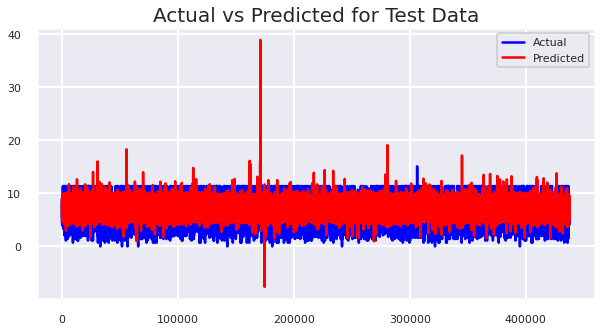

In [111]:
#Actual vs Prediction
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_lasso_test, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

# **XGBoost Regression**

In [112]:
#Importing XGBoost
import xgboost

In [113]:
#Creating instance for our XGBoost
xgb_reg = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=10)

# fitting our model using .fit funtion
xgb_reg.fit(x_train, y_train)

# taking prediction from our model using .predict function
y_pred = xgb_reg.predict(x_test)

print('Pridicted Value\n')
y_pred

[07:15:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Pridicted Value



array([5.3356395, 6.493344 , 6.061499 , ..., 6.8843727, 6.9904165,
       6.8946767], dtype=float32)

<Figure size 432x216 with 0 Axes>

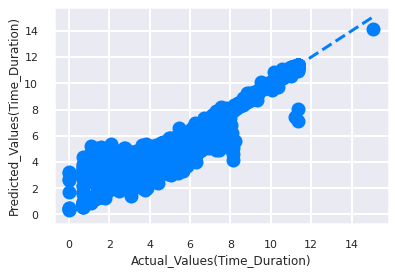

In [114]:
# Using our defined funtion that will plot regresson plot.
train_vs_pred_plot(y_test,y_pred)

In [115]:
# checking the result of our regression model by calculating
# Train and Test accuracy , r2 score and also RMSE scores
result_2 = model_results(xgb_reg,y_pred)
result_2 = result_2.set_index(pd.Series(['XGBOOST']))

In [116]:
total_result_1 = pd.concat([result_1,result_2])
total_result_1

,Training_Score,Testing_Score,R2_Score,ADJ_R2,MSE,RMSE
Linear Regression,0.591141,0.591825,0.591825,0.591807,0.259843,0.509748
Decision Tree Regression,0.976706,0.975430,0.975430,0.975429,0.015641,0.125064
Random Forest Regression,0.980948,0.979897,0.979897,0.979896,0.012797,0.113126
XGBOOST,0.996709,0.994279,0.994279,0.994279,0.003642,0.060348


As we can see that XGBoost is performing well compared to other models.

**Plotting comparison graph between above mentioned model**

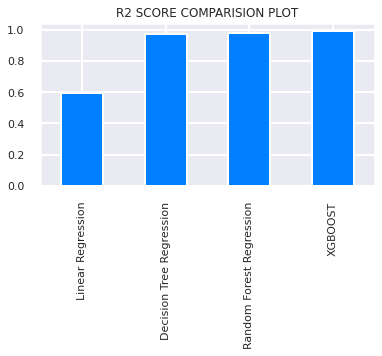

In [117]:
#For r2 score
R2_score_plot(total_result_1.index, total_result_1)

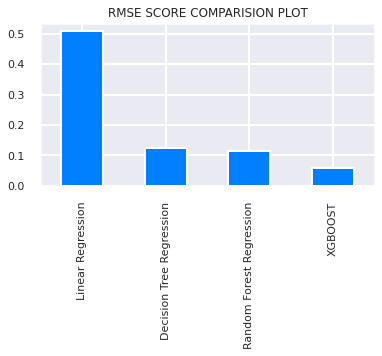

In [118]:
#For RMSE
RMSE_score_plot(total_result_1.index, total_result_1)


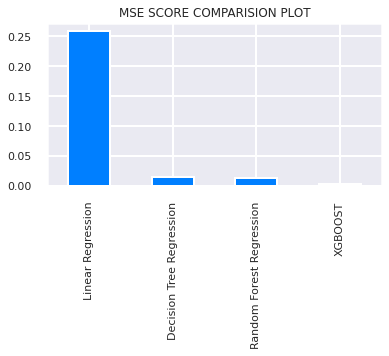

In [119]:
#For mse
MSE_score_plot(total_result_1.index, total_result_1)



*   Linear regression, Lasso regression and Ridge regression not performing well in terms of accuracy where r2 is very low also RMSE is also quite high.
We can say that there is no difference in the accuracy of this three models.
*   Random forest regressor and Decision tree regressor are performing well in terms of all metrics.
*   We can see that the Random forest regression is slightly good than Decision tree regression.
*   Although, XGBoost regression is performing really good with high accuracy also the error term is quite low as compared to other five regression model


This all model performed without standardizing the features. Now we'll see how the model will perform if there is the standardization of features.



# **Building A Model Using Standardized Features**

Again splitting the data to train and test the data.

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2)

In [121]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1020895, 19), (437527, 19), (1020895,), (437527,))

Using standard scaler standardizing the features.

In [122]:
#Importing standard scaler
from sklearn.preprocessing import StandardScaler

In [123]:
# Creating instance for our standard scaler

scaler = StandardScaler()

In [124]:
#Standadizing our data x_train and x_test
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

So we standardized the features.

Prediction by LinearRegression :
 [6.43536375 6.04990003 6.57308844 ... 6.28725913 9.69408054 6.52609705]


<Figure size 432x216 with 0 Axes>

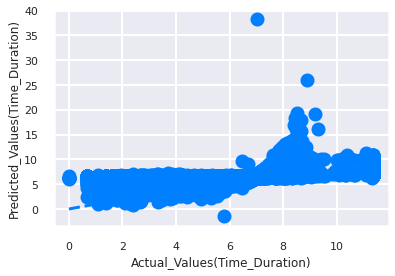


Prediction by DecisionTreeRegressor :
 [6.77549921 6.11102935 6.96454961 ... 5.89548384 8.28415983 6.58098929]


<Figure size 432x216 with 0 Axes>

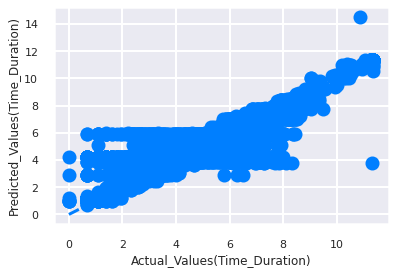


Prediction by RandomForestRegressor :
 [6.75671345 6.20692526 6.9212662  ... 5.92409671 8.23835193 6.65932426]


<Figure size 432x216 with 0 Axes>

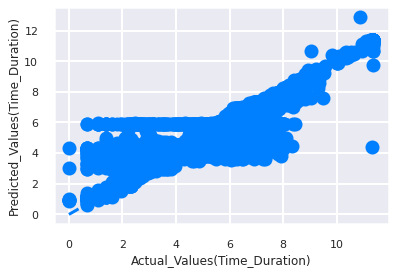

In [125]:
result_3 = modeling(models)

# **XGBoost Regression with standardized features**

In [126]:
# Creating instance for our XGBoost
xgb_reg = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=10)

# fitting our model using .fit funtion
xgb_reg.fit(x_train, y_train)

# taking prediction from our model using .predict function
y_pred = xgb_reg.predict(x_test)

print('Pridicted Value')
y_pred

[07:30:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Pridicted Value


array([6.7472544, 6.171793 , 6.934142 , ..., 5.9260902, 8.215317 ,
       6.633907 ], dtype=float32)

<Figure size 432x216 with 0 Axes>

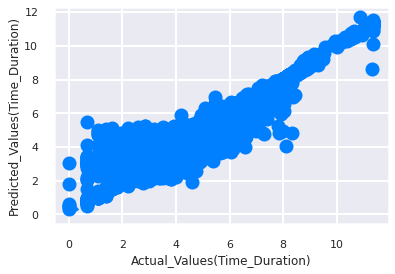

In [127]:
#XGBoost regression plot
train_vs_pred_plot(y_test,y_pred)

In [128]:
# checking the result Train and Test accuracy , r2 score and also RMSE scores
result_4 = model_results(xgb_reg,y_pred)
result_4 = result_4.set_index(pd.Series(['XGBOOST']))

In [129]:
final_result_2 = pd.concat([result_3,result_4])
final_result_2

,Training_Score,Testing_Score,R2_Score,ADJ_R2,MSE,RMSE
Linear Regression,0.589935,0.594624,0.594624,0.594607,0.259212,0.509129
Decision Tree Regression,0.976689,0.976901,0.976901,0.976900,0.014770,0.121534
Random Forest Regression,0.980176,0.980280,0.980280,0.980279,0.012610,0.112292
XGBOOST,0.996232,0.993903,0.993903,0.993902,0.003899,0.062441


Plotting Comparison plot between the above mentioned models

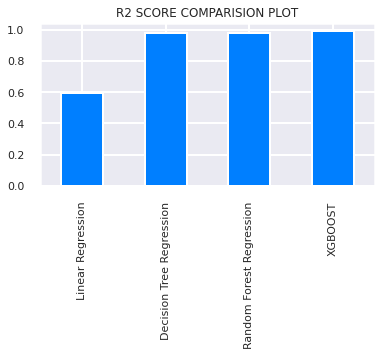

In [130]:
#For R2 score

R2_score_plot(final_result_2.index, final_result_2)

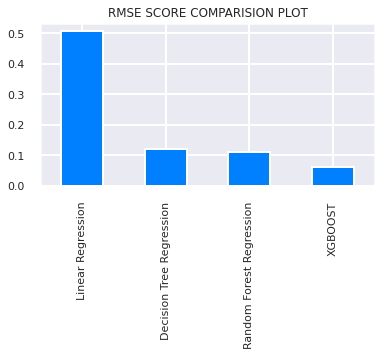

In [131]:
#For RMSE score
RMSE_score_plot(final_result_2.index , final_result_2)


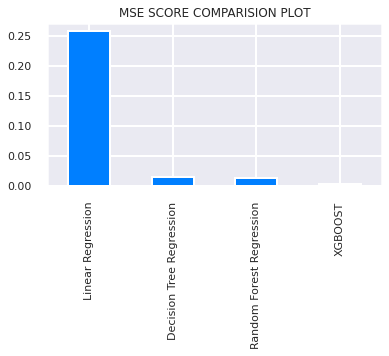

In [132]:
#For MSE score
MSE_score_plot(final_result_2.index, final_result_2)


# **Ridge regression after standardizing the features**

In [133]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [134]:
print('The best fit alpha value is found out to be :' ,ridge_regressor.best_params_)
print('The R2 score using the same alpha is :', ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 100}
The R2 score using the same alpha is : 0.5762074680218625


In [135]:
y_pred_ridge_train=ridge_regressor.predict(x_train)
y_pred_ridge_test = ridge_regressor.predict(x_test)

Ridge regression model Evaluation

In [136]:
ridge_regressor.score(x_train, y_train)

0.5899346607648064

In [137]:
#For trained data
ridge_train_mse  = mean_squared_error(y_train, y_pred_ridge_train)
print("Train MSE :" , ridge_train_mse)

ridge_train_r2 = r2_score(y_train, y_pred_ridge_train)
print("Train R2 :" ,ridge_train_r2)

ridge_train_r2_= 1-(1-r2_score(y_train, y_pred_ridge_train))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print("Train Adjusted R2 : ", ridge_train_r2)

ridge_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_ridge_train))
print("Train RMSE : ", ridge_train_mse)

Train MSE : 0.2609324896748073
Train R2 : 0.5899346607648064
Train Adjusted R2 :  0.5899346607648064
Train RMSE :  0.2609324896748073


In [138]:
ridge_regressor.score(x_test, y_test)

0.5946218072533849

In [139]:
#For test data
ridge_test_mse  = mean_squared_error(y_test, y_pred_ridge_test)
print("Test MSE :" , ridge_test_mse)

ridge_test_r2 = r2_score(y_test, y_pred_ridge_test)
print("Test R2 :" ,ridge_test_r2)

ridge_test_r2_= 1-(1-r2_score(y_test, y_pred_ridge_test))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Test Adjusted R2 : ", ridge_test_r2_)

ridge_test_rmse = np.sqrt(mean_squared_error(y_test,y_pred_ridge_test))
print("Test RMSE : ", ridge_test_rmse)

Test MSE : 0.2592138798185277
Test R2 : 0.5946218072533849
Test Adjusted R2 :  0.594604202539261
Test RMSE :  0.5091305135410052


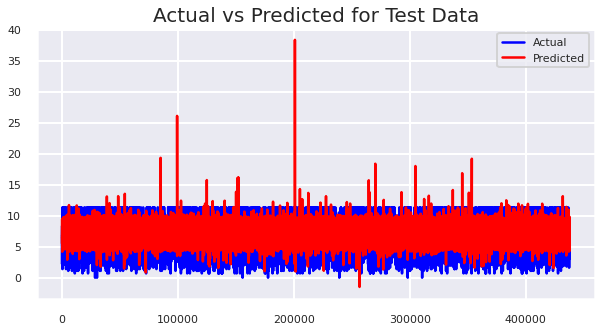

In [140]:
#Plotting Actual vs Prediction graph
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_ridge_test, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

# **Lasso Regression after standardizing the features**

In [141]:
#Cross validation

lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [142]:
print('The best fit alpha value is found out to be :', lasso_regressor.best_params_)
print('The R2 score using the same alpha is :', lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}
The R2 score using the same alpha is : 0.5804564756463643


In [143]:
lasso_regressor.score(x_train, y_train)

0.5869774052808896

In [144]:
y_pred_lasso_train = lasso_regressor.predict(x_train)
y_pred_lasso_test = lasso_regressor.predict(x_test)

Lasso regression model evaluation

In [145]:
import math
#For train data
lasso_train_mse  = mean_squared_error(y_train, y_pred_lasso_train)
print("Train MSE :" , lasso_train_mse)

lasso_train_r2 = r2_score(y_train, y_pred_lasso_train)
print("Train R2 :" ,lasso_train_r2)

lasso_train_r2_= 1-(1-r2_score(y_train, y_pred_lasso_train))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print("Train Adjusted R2 : ", lasso_train_r2)

lasso_train_rmse = math.sqrt(lasso_train_mse)
print("Train RMSE: " , lasso_train_rmse)

Train MSE : 0.2628142484146756
Train R2 : 0.5869774052808896
Train Adjusted R2 :  0.5869774052808896
Train RMSE:  0.5126541216206846


In [146]:
lasso_regressor.score(x_test,y_test)

0.590917013352767

In [147]:
#For test model
lasso_test_mse  = mean_squared_error(y_test, y_pred_lasso_test)
print("Test MSE :" , lasso_test_mse)

lasso_test_r2 = r2_score(y_test, y_pred_lasso_test)
print("Test R2 :" ,lasso_test_r2)

lasso_test_r2_= 1-(1-r2_score(y_test, y_pred_lasso_test))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Test Adjusted R2 : ", lasso_test_r2_)

lasso_test_rmse = math.sqrt(lasso_test_mse)
print("Test RMSE : ", lasso_test_rmse)

Test MSE : 0.261582862704362
Test R2 : 0.590917013352767
Test Adjusted R2 :  0.5908992477473108
Test RMSE :  0.511451720795191


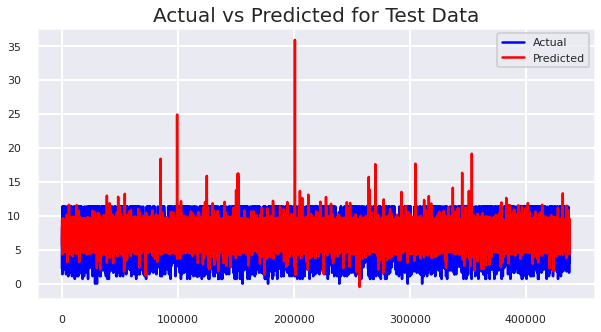

In [148]:
#Actual vs Prediction
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_lasso_test, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()



*   As we can see after standardizing the features there are no changes in the accuracy of linear regression and also other metrics.
*   There are no good changes in Lasso And Ridge regression in accuracy and rmse although accuracy of both model has decreased after standardizing the features.
*   We can see the little improvement in Descision tree, Random Forest and XGBoost.
*   Random forest is performing slightly good as compared Decision tree regression althought both the models are good to go.
*   Here we have XGBoost regression with higher accuracy and the lowest rmse also performing very good with respect to all the metrics.



In [149]:
from prettytable import PrettyTable
table = PrettyTable(['Mode Name', 'Training Score', 'Testing Score', 'R2 square', 'AdJ R2', 'MSE', 'RMSE'])
table.add_row(['Linear regression', 0.589935,	0.594624,	0.594624,	0.594607,	0.259212,	0.509129])
table.add_row(['Decision Tree Regression',	0.976689,	0.976769,	0.976769,	0.976768,	0.014855,	0.121881])
table.add_row(['Random Forest Regression',	0.980394,	0.980680,	0.980680,	0.980679,	0.012354,	0.111149])
table.add_row(['XGBOOST',	0.996232,	0.993903,	0.993903,	0.993902,	0.003899,	0.062441]) 
table.add_row(['Ridge Regression', 0.589934, 0.594621, 0.594621,  0.594604,  0.259213,  0.509130])
table.add_row(['Lasso Regression',0.586977, 0.590917,  0.590917,  0.590899,  0.261582,  0.511451  ])

In [150]:
print(table)

+--------------------------+----------------+---------------+-----------+----------+----------+----------+
|        Mode Name         | Training Score | Testing Score | R2 square |  AdJ R2  |   MSE    |   RMSE   |
+--------------------------+----------------+---------------+-----------+----------+----------+----------+
|    Linear regression     |    0.589935    |    0.594624   |  0.594624 | 0.594607 | 0.259212 | 0.509129 |
| Decision Tree Regression |    0.976689    |    0.976769   |  0.976769 | 0.976768 | 0.014855 | 0.121881 |
| Random Forest Regression |    0.980394    |    0.98068    |  0.98068  | 0.980679 | 0.012354 | 0.111149 |
|         XGBOOST          |    0.996232    |    0.993903   |  0.993903 | 0.993902 | 0.003899 | 0.062441 |
|     Ridge Regression     |    0.589934    |    0.594621   |  0.594621 | 0.594604 | 0.259213 | 0.50913  |
|     Lasso Regression     |    0.586977    |    0.590917   |  0.590917 | 0.590899 | 0.261582 | 0.511451 |
+--------------------------+---------

# **Conclusion**

* As until now we have tried multiple models with and without standardizing the features also comapred them with all aspects and we can see XGBoost is performing good compared to linear, ridge, lasso, decision and random forest.
* Also the decision tree and random forest are performing good with or without standardizing the features.
* After standardizing the features there is no much difference in the accuracy or other matrics of models.
* Lasso and Rigde are not performing well after standardizing the features either. Their accuracy has been decreased by 1%.
* At last we can conclude that the XGBoost is the best fit model for good prediction rate and lesser error.

# **Future Work**

As we saw that the dataset contains the data of only 6 months there should be more data perhaps more than a year from which we can retrieve more features so we can train our model more efficiently and we can get more better performances from the machine learninig models.